In [55]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras import metrics

import matplotlib.pyplot as plt 
%matplotlib inline

In [56]:
(train_data, train_label), (test_data, test_label) = imdb.load_data(num_words = 10000)

In [57]:
import numpy as np

def vectorize_sequences(sequences, dimensions = 10000):
  results = np.zeros((len(sequences), dimensions))
  for i,sequences in enumerate(sequences):
    results[i, sequences] = 1
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [58]:
y_train = np.asarray(train_label).astype('float32')
y_test = np.asarray(test_label).astype('float32')

In [59]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [60]:
x_train.shape

(25000, 10000)

In [61]:
y_train = np.asarray(train_label).astype('float32') 
y_test = np.asarray(test_label).astype('float32')

In [62]:
# Model Defination
model = Sequential()
model.add(Dense(16, input_shape=(10000, ), activation = "relu"))
model.add(Dense(16, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

c:\Users\Anand Dwivedi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [63]:
model.compile(
    optimizer='adam', 
    loss = 'mse', 
    metrics = ['accuracy'])

In [64]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
X_val = x_train[:10000]
partial_X_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [66]:
history = model.fit(x_train, y_train, validation_split = 0.3, epochs = 20, verbose = 1, batch_size = 512)

Epoch 1/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.6797 - loss: 0.2192 - val_accuracy: 0.8679 - val_loss: 0.1282
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8953 - loss: 0.1059 - val_accuracy: 0.8905 - val_loss: 0.0911
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9272 - loss: 0.0677 - val_accuracy: 0.8931 - val_loss: 0.0823
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9502 - loss: 0.0492 - val_accuracy: 0.8927 - val_loss: 0.0806
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9637 - loss: 0.0384 - val_accuracy: 0.8887 - val_loss: 0.0820
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9714 - loss: 0.0305 - val_accuracy: 0.8889 - val_loss: 0.0827
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9810 - loss: 0.0237 - val_accuracy: 0.8872 - val_loss: 0.0853
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9847 - loss: 0.0202 - val_accuracy: 0.8829 - v

In [67]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

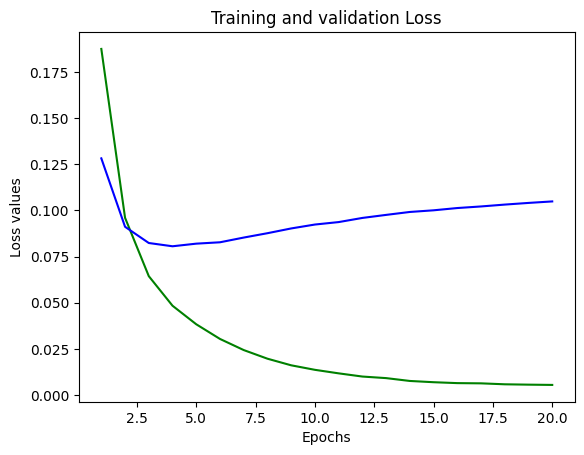

In [68]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,len(loss_values)+1)

plt.plot(epochs, loss_values,'g', label = "Training loss")
plt.plot(epochs, val_loss_values,'b', label = "Validation loss")

plt.title("Training and validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss values')

plt.show()

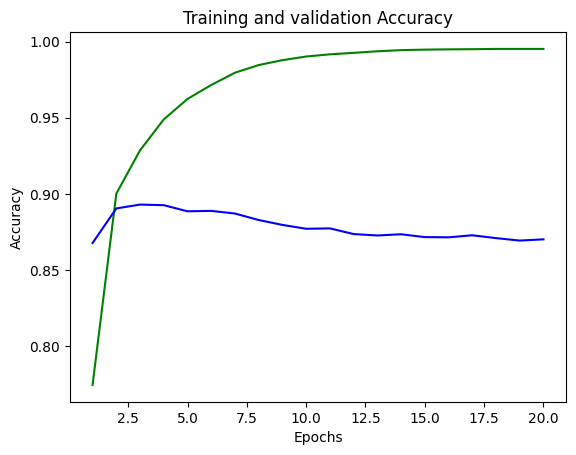

In [69]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1,len(loss_values)+1)

plt.plot(epochs, acc_values,'g', label = "Training accuracy")
plt.plot(epochs, val_acc_values,'b', label = "Validation accuracy")

plt.title("Training and validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

In [70]:
np.set_printoptions(suppress=True)
result = model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [71]:
print(result)

[[0.26325783]
 [0.9999978 ]
 [0.03802942]
 ...
 [0.2936443 ]
 [0.00519861]
 [0.17296474]]


In [72]:
y_pred = np.zeros(len(result))
for i, score in enumerate(result):
    y_pred[i]=np.round(score)
    print(y_pred[i])

0.0
1.0
0.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
0.0
0.0
0.0
1.0
0.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
1.0
1.0
0.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
1.0
0.0
1.0
1.0
0.0
0.0
0.0
1.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
0.0
1.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
0.0
1.0
0.0
0.0
1.0
1.0
0.0
0.0
1.0
0.0
1.0
0.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
1.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
1.0
1.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
1.0
1.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
1.0
0.0
0.0
0.0
1.0
1.0
0.0
1.0
1.0
1.0


In [75]:
mse_nn, mae_nn = model.evaluate(x_test, y_test)

print('Mean squared error on test data is: ', mse_nn)
print('Mean absolute error on test data is: ', mae_nn)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8577 - loss: 0.1170
Mean squared error on test data is:  0.11786412447690964
Mean absolute error on test data is:  0.8559600114822388
